In [348]:
from time import time 
import numpy as np
import pandas as pd
from IPython.display import display
from tqdm import tqdm
from collections import Counter
import ast

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sb

from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
import scipy.stats as stats
from scipy.sparse import csr_matrix
import spacy

from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE

import re  # For preprocessing
import pandas as pd  # For data handling
from time import time  # To time our operations
from collections import defaultdict  # For word frequency

import spacy  # For preprocessing

import logging  # Setting up the loggings to monitor gensim
logging.basicConfig(format="%(levelname)s - %(asctime)s: %(message)s", datefmt= '%H:%M:%S', level=logging.INFO)
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook
output_notebook()


%matplotlib inline

Loading BokehJS ...

In [147]:
nlp = spacy.load('en', disable=['ner', 'parser']) # disabling Named Entity Recognition for speed

In [158]:
import numpy as np
b=np.load('ny.eater-content-new.npy')
content=b.tolist()

In [187]:
def cleaning(doc):
    # Lemmatizes and removes stopwords
    # doc needs to be a spacy Doc object
    txt = [token.lemma_ for token in doc if not token.is_stop]
    # Word2Vec uses context words to learn the vector representation of a target word,
    # if a sentence is only one or two words long,
    # the benefit for the training is very small
    if len(txt) > 2:
        return ' '.join(txt)

new_content = []
for article in content:
    if article != []:
        text = ""
        for sent in article:
            text = text + sent
        new_content.append(text)


In [189]:
brief_cleaning = (re.sub("[^A-Za-z']+", ' ', re.sub("'s", '', re.sub("’s", '',str(article)))).lower() for article in new_content)

t = time()

txt = [cleaning(doc) for doc in nlp.pipe(brief_cleaning, batch_size=5000, n_threads=-1)]

print('Time to clean up everything: {} mins'.format(round((time() - t) / 60, 2)))

df_clean = pd.DataFrame({'clean': txt})
df_clean = df_clean.dropna().drop_duplicates()
df_clean.shape

Time to clean up everything: 0.48 mins


(395, 1)

In [322]:
cleaned_data = df_clean['clean']

In [325]:
preprocessed_reviews = []
for article in cleaned_data:
    preprocessed_reviews.append(article)

In [307]:
import pandas as pd 
  
# initialize list of lists 
  
# Create the pandas DataFrame 
filtered_data = pd.DataFrame(new_content, columns = ['Text']) 
  
# print dataframe. 


In [308]:
# https://stackoverflow.com/a/47091490/4084039
import re
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
# general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase
# https://gist.github.com/sebleier/554280
stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])

In [309]:
# Combining all the above stundents 
from tqdm import notebook
from bs4 import BeautifulSoup
preprocessed_reviews = []
# tqdm is for printing the status bar
for sentance in notebook.tqdm(filtered_data['Text'].values):
    sentance = re.sub(r"http\S+", "", sentance)
    sentance = BeautifulSoup(sentance, 'lxml').get_text()
    sentance = decontracted(sentance)
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    # https://gist.github.com/sebleier/554280
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords)
    preprocessed_reviews.append(sentance.strip())
filtered_data['CleanedText']=preprocessed_reviews
# cleaned_data = filtered_data['CleanedText']

In [311]:
cd=filtered_data['CleanedText']

In [320]:
preprocessed_reviews = 

['zhen wei fang tang hotpot powered flashy decor robust suite meats complex flavorful brothsthe useful thing know vandal bacchanalian bowery temple viral foods faux street art basic cocaine lifestyle adjacent another let long night spot actually worth visiting zhen wei fang backed wei chen congee village team pairs pristine hot pot fare absolutely wild environment robot host greets guests mandarin mixed martial arts matches play four televisions michael jackson pumps sound system multitiered meat trays rise feet every table flaunting vertical croppings raw lamb beef tofu skin diners use chopsticks plunge red ribbons new zealand lamb white bone broth turning flesh brown soft succulent slurp meat almost easily would noodle want combine hot pot hours sake fueled karaoke private rooms also semi private rooms double immersive multimedia carousels high tech projectors broadcast computer generated nature footage three separate walls giving patrons sensation dining inside imax universe inspire

In [305]:
preprocessed_reviews

[]

In [327]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
STOPWORDS = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()
def clean_text(text):
    stop_not = " ".join([i for i in text.lower().split() if i not in STOPWORDS])
    punctuation_free = "".join([i for i in stop_not if i not in exclude])
    normalized = " ".join(lemma.lemmatize(word) for word in punctuation_free.split())
    return normalized
document_cleaned = [clean_text(text).split() for text in preprocessed_reviews]

In [193]:
# Define helper functions
# code referneces: https://www.kaggle.com/rcushen/topic-modelling-with-lsa-and-lda
# count_vectorizer = CountVectorizer(stop_words='english')
def get_top_n_words(n_top_words, count_vectorizer, text_data):
    '''
    returns a tuple of the top n words in a sample and their 
    accompanying counts, given a CountVectorizer object and text sample
    '''
    vectorized_headlines = count_vectorizer.fit_transform(text_data.values)
    vectorized_total = np.sum(vectorized_headlines, axis=0)
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)
    
    word_vectors = np.zeros((n_top_words, vectorized_headlines.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1
    words = [word[0].encode('ascii').decode('utf-8') for word in count_vectorizer.inverse_transform(word_vectors)]
    return (words, word_values[0,:n_top_words].tolist()[0])

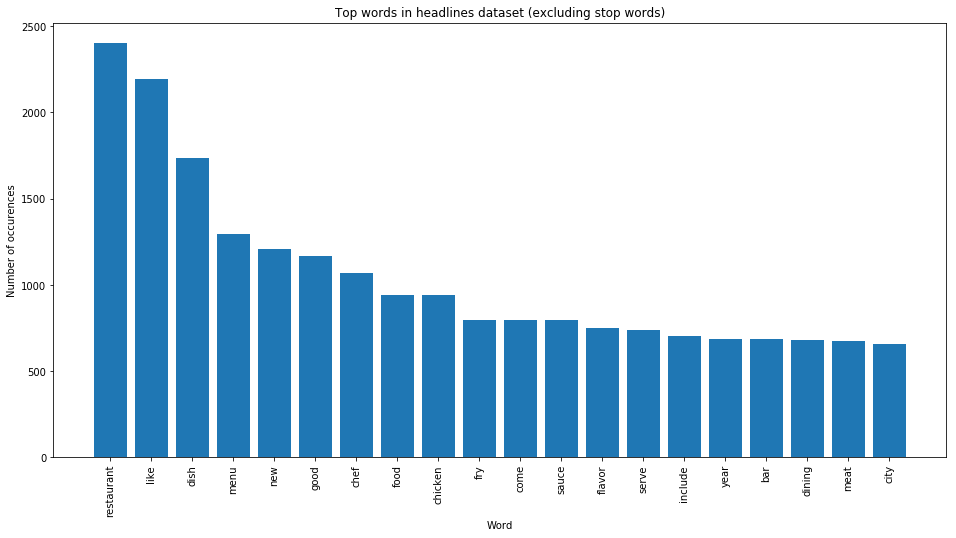

In [194]:
count_vectorizer = CountVectorizer(stop_words='english')
words, word_values = get_top_n_words(n_top_words=20, count_vectorizer=count_vectorizer, text_data=cleaned_data)
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values);
ax.set_xticks(range(len(words)));
ax.set_xticklabels(words, rotation='vertical');
ax.set_title('Top words in headlines dataset (excluding stop words)');
ax.set_xlabel('Word');
ax.set_ylabel('Number of occurences');
plt.show()

In [333]:
tagged_data = [TextBlob(cleaned_data[i]).pos_tags for i in range(cleaned_data.shape[0])]
tagged_data_df = pd.DataFrame({'tags':tagged_data})
word_counts = [] 
pos_counts = {}
for headline in tagged_data_df[u'tags']:
    word_counts.append((len(headline)//100)*100)
    for tag in headline:
        if tag[1] in pos_counts:
            pos_counts[tag[1]] += 1
        else:
            pos_counts[tag[1]] = 1
            
print('Total number of words: ', np.sum(word_counts))
print('Mean number of words per headline: ', np.mean(word_counts))

Total number of words:  262800
Mean number of words per headline:  665.3164556962025


In [341]:
len(word_counts)

395

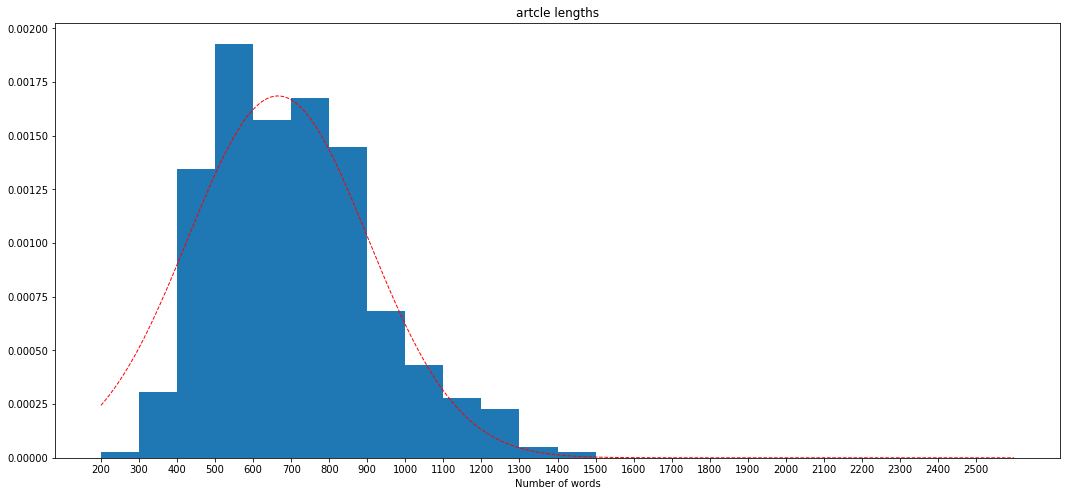

In [342]:
y = stats.norm.pdf(np.linspace(200,2600,395), np.mean(word_counts), np.std(word_counts))

fig, ax = plt.subplots(figsize=(18,8))
ax.hist(word_counts, bins=range(200,2600,100), density=True);
ax.plot(np.linspace(200,2600,395), y, 'r--', linewidth=1);
ax.set_title('artcle lengths');
ax.set_xticks(range(200,2600,100));
ax.set_xlabel('Number of words');
plt.show()

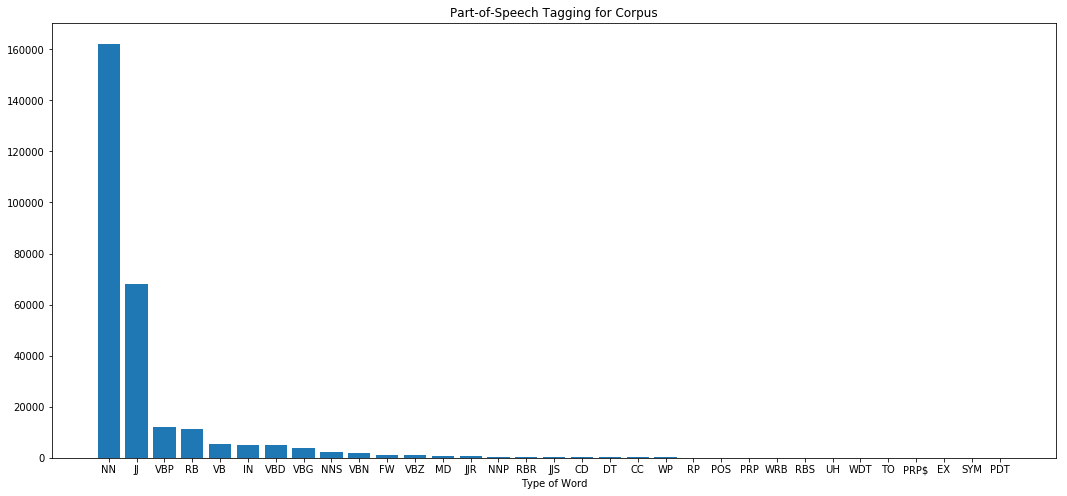

In [349]:
pos_sorted_types = sorted(pos_counts, key=pos_counts.__getitem__, reverse=True)
pos_sorted_counts = sorted(pos_counts.values(), reverse=True)

fig, ax = plt.subplots(figsize=(18,8))
ax.bar(range(len(pos_counts)), pos_sorted_counts);
ax.set_xticks(range(len(pos_counts)));
ax.set_xticklabels(pos_sorted_types);
ax.set_title('Part-of-Speech Tagging for Corpus');
ax.set_xlabel('Type of Word');

In [295]:
small_count_vectorizer = CountVectorizer(stop_words='english', max_features=40000)
small_text_sample = cleaned_data.values

# print('Headline before vectorization: {}'.format(small_text_sample[99]))

small_document_term_matrix = small_count_vectorizer.fit_transform(small_text_sample)

# print('Headline after vectorization: \n{}'.format(small_document_term_matrix[99]))

In [296]:
n_topics = 8
lsa_model = TruncatedSVD(n_components=n_topics)
lsa_topic_matrix = lsa_model.fit_transform(small_document_term_matrix)
def get_keys(topic_matrix):
    '''
    returns an integer list of predicted topic 
    categories for a given topic matrix
    '''
    keys = topic_matrix.argmax(axis=1).tolist()
    return keys
def keys_to_counts(keys):
    '''
    returns a tuple of topic categories and their 
    accompanying magnitudes for a given list of keys
    '''
    count_pairs = Counter(keys).items()
    categories = [pair[0] for pair in count_pairs]
    counts = [pair[1] for pair in count_pairs]
    return (categories, counts)
lsa_keys = get_keys(lsa_topic_matrix)
lsa_categories, lsa_counts = keys_to_counts(lsa_keys)

In [297]:
small_document_term_matrix[0][0]


<1x22704 sparse matrix of type '<class 'numpy.int64'>'
	with 763 stored elements in Compressed Sparse Row format>

In [299]:
top_n_words_lsa = get_top_n_words(8, lsa_keys, small_document_term_matrix, small_count_vectorizer)
for i in range(len(top_n_words_lsa)):
    print("Topic {}: ".format(i+1), top_n_words_lsa[i])

Topic 1:  restaurant like dish menu new good chef food
Topic 2:  dish sample drink like sandwich sauce chicken shrimp
Topic 3:  zz flipping flottante flounder flour flourish flow flower
Topic 4:  zz flipping flottante flounder flour flourish flow flower
Topic 5:  pizza pie new tomato like emmy cheese restaurant
Topic 6:  zz flipping flottante flounder flour flourish flow flower
Topic 7:  zz flipping flottante flounder flour flourish flow flower
Topic 8:  player open expect chef project location opening restaurant


In [298]:
# Define helper functions
def get_top_n_words(n, keys, document_term_matrix, count_vectorizer):
    '''
    returns a list of n_topic strings, where each string contains the n most common 
    words in a predicted category, in order
    '''
    top_word_indices = []
    for topic in range(n_topics):
        temp_vector_sum = csr_matrix((1,22704), dtype=np.int64)
        for i in range(len(keys)):
            if keys[i] == topic:
                temp_vector_sum += document_term_matrix[i]
        temp_vector_sum = temp_vector_sum.toarray()
        top_n_word_indices = np.flip(np.argsort(temp_vector_sum)[0][-n:],0)
        top_word_indices.append(top_n_word_indices)   
    top_words = []
    for topic in top_word_indices:
        topic_words = []
        for index in topic:
            temp_word_vector = np.zeros((1,document_term_matrix.shape[1]))
            temp_word_vector[:,index] = 1
            the_word = count_vectorizer.inverse_transform(temp_word_vector)[0][0]
            topic_words.append(the_word.encode('ascii').decode('utf-8'))
        top_words.append(" ".join(topic_words))         
    return top_words

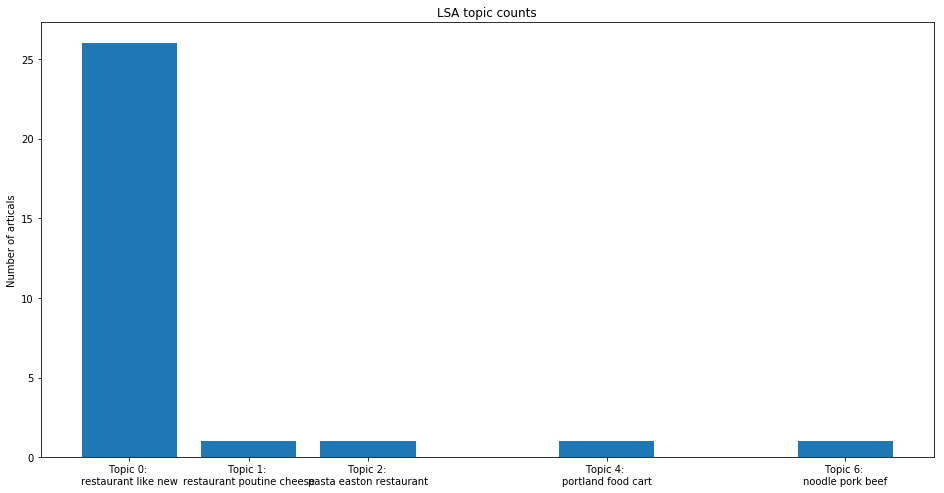

In [282]:
top_3_words = get_top_n_words(3, lsa_keys, small_document_term_matrix, small_count_vectorizer)
labels = ['Topic {}: \n'.format(i) + top_3_words[i] for i in lsa_categories]

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(lsa_categories, lsa_counts);
ax.set_xticks(lsa_categories);
ax.set_xticklabels(labels);
ax.set_ylabel('Number of articals');
ax.set_title('LSA topic counts');
plt.show()

In [284]:
tsne_lsa_model = TSNE(n_components=2, perplexity=50, learning_rate=100, 
                        n_iter=2000, verbose=1, random_state=0, angle=0.75)
tsne_lsa_vectors = tsne_lsa_model.fit_transform(lsa_topic_matrix)

[t-SNE] Computing 29 nearest neighbors...
[t-SNE] Indexed 30 samples in 0.000s...
[t-SNE] Computed neighbors for 30 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 30 / 30
[t-SNE] Mean sigma: 30.845299
[t-SNE] KL divergence after 250 iterations with early exaggeration: 45.352047
[t-SNE] KL divergence after 950 iterations: 0.483482


In [286]:
# Define helper functions
def get_mean_topic_vectors(keys, two_dim_vectors):
    '''
    returns a list of centroid vectors from each predicted topic category
    '''
    mean_topic_vectors = []
    for t in range(n_topics):
        articles_in_that_topic = []
        for i in range(len(keys)):
            if keys[i] == t:
                articles_in_that_topic.append(two_dim_vectors[i])    
        
        articles_in_that_topic = np.vstack(articles_in_that_topic)
        mean_article_in_that_topic = np.mean(articles_in_that_topic, axis=0)
        mean_topic_vectors.append(mean_article_in_that_topic)
    return mean_topic_vectors

In [283]:
colormap = np.array([
    "#1f77b4", "#aec7e8", "#ff7f0e", "#ffbb78", "#2ca02c",
    "#98df8a", "#d62728", "#ff9896", "#9467bd", "#c5b0d5",
    "#8c564b", "#c49c94", "#e377c2", "#f7b6d2", "#7f7f7f",
    "#c7c7c7", "#bcbd22", "#dbdb8d", "#17becf", "#9edae5" ])
colormap = colormap[:n_topics]

In [287]:
top_3_words_lsa = get_top_n_words(3, lsa_keys, small_document_term_matrix, small_count_vectorizer)
lsa_mean_topic_vectors = get_mean_topic_vectors(lsa_keys, tsne_lsa_vectors)

plot = figure(title="t-SNE Clustering of {} LSA Topics".format(n_topics), plot_width=700, plot_height=700)
plot.scatter(x=tsne_lsa_vectors[:,0], y=tsne_lsa_vectors[:,1], color=colormap[lsa_keys])

for t in range(n_topics):
    label = Label(x=lsa_mean_topic_vectors[t][0], y=lsa_mean_topic_vectors[t][1], 
                  text=top_3_words_lsa[t], text_color=colormap[t])
    plot.add_layout(label)
    
show(plot)

ValueError: need at least one array to concatenate

In [289]:
lda_model = LatentDirichletAllocation(n_components=n_topics, learning_method='online', 
                                          random_state=0, verbose=0)
lda_topic_matrix = lda_model.fit_transform(small_document_term_matrix)


In [290]:
lda_keys = get_keys(lda_topic_matrix)
lda_categories, lda_counts = keys_to_counts(lda_keys)

In [300]:
top_n_words_lda = get_top_n_words(10, lda_keys, small_document_term_matrix, small_count_vectorizer)

for i in range(len(top_n_words_lda)):
    print("Topic {}: ".format(i+1), top_n_words_lda[i])

Topic 1:  zz flipping flottante flounder flour flourish flow flower flowering flowerssushi
Topic 2:  zz flipping flottante flounder flour flourish flow flower flowering flowerssushi
Topic 3:  dish restaurant like chef sauce meat yaki menu good spot
Topic 4:  dish like restaurant new fry rice york korean food chicken
Topic 5:  like restaurant dish new meat sauce flavor room dining wine
Topic 6:  zz flipping flottante flounder flour flourish flow flower flowering flowerssushi
Topic 7:  like restaurant chef sushi new dish menu pot room hot
Topic 8:  noodle bar raman chang like pork sole serve soft bun


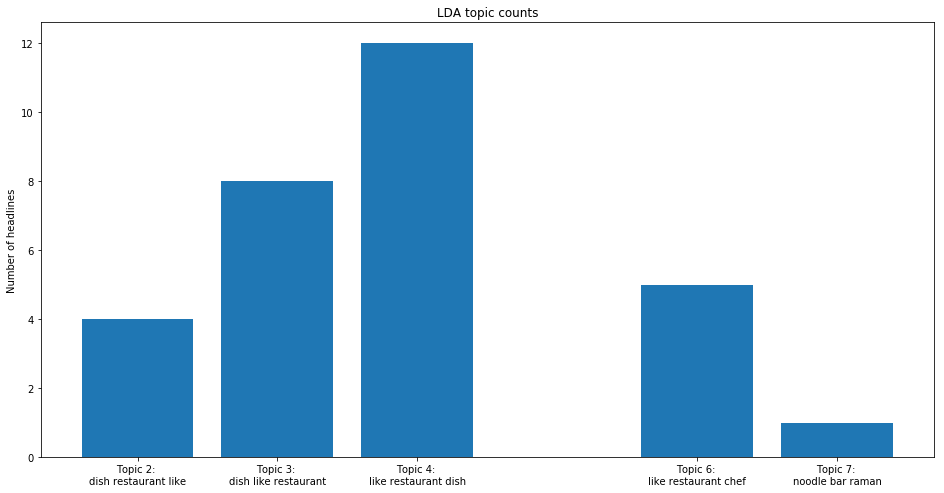

In [301]:
top_3_words = get_top_n_words(3, lda_keys, small_document_term_matrix, small_count_vectorizer)
labels = ['Topic {}: \n'.format(i) + top_3_words[i] for i in lda_categories]

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(lda_categories, lda_counts);
ax.set_xticks(lda_categories);
ax.set_xticklabels(labels);
ax.set_title('LDA topic counts');
ax.set_ylabel('Number of headlines');

In [344]:
import numpy as np
import pandas as pd

import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

import spacy
from spacy.lemmatizer import Lemmatizer
from spacy.lang.en.stop_words import STOP_WORDS
import en_core_web_lg

from tqdm import tqdm_notebook as tqdm
from pprint import pprint

In [345]:
bigram = gensim.models.Phrases(document_cleaned, min_count=5, threshold=100) 
trigram = gensim.models.Phrases(bigram[document_cleaned], threshold=100)
bigram_mod = gensim.models.phrases.Phraser(bigram)
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]
data_words_bigrams = make_bigrams(document_cleaned)
# Creating the term dictionary of our courpus, 
# where every unique term is assigned an index. 
dictionary = corpora.Dictionary(data_words_bigrams)
# Converting list of documents (corpus) 
# into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(text) for text in data_words_bigrams]
# Build the LDA model
from gensim.models import LdaModel
lda_model = LdaModel(corpus=doc_term_matrix,id2word=dictionary,num_topics=10,random_state=100,update_every=1,chunksize=2000,passes=1,alpha='auto',per_word_topics=True)
lda_model.print_topics()

INFO - 12:05:19: collecting all words and their counts
INFO - 12:05:19: PROGRESS: at sentence #0, processed 0 words and 0 word types
INFO - 12:05:19: collected 237134 word types from a corpus of 278623 words (unigram + bigrams) and 395 sentences
INFO - 12:05:19: using 237134 counts as vocab in Phrases<0 vocab, min_count=5, threshold=100, max_vocab_size=40000000>
INFO - 12:05:19: collecting all words and their counts
INFO - 12:05:19: PROGRESS: at sentence #0, processed 0 words and 0 word types
INFO - 12:05:20: collected 238626 word types from a corpus of 266867 words (unigram + bigrams) and 395 sentences
INFO - 12:05:20: using 238626 counts as vocab in Phrases<0 vocab, min_count=5, threshold=100, max_vocab_size=40000000>
INFO - 12:05:21: source_vocab length 237134
INFO - 12:05:22: Phraser built with 723 phrasegrams
INFO - 12:05:23: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 12:05:23: built Dictionary(23254 unique tokens: ['abalone', 'absolutely', 'absurd', 'accessible'

[(0,
  '0.009*"like" + 0.006*"restaurant" + 0.005*"menu" + 0.004*"chef" + 0.004*"dish" + 0.004*"good" + 0.003*"food" + 0.003*"chicken" + 0.003*"serve" + 0.003*"come"'),
 (1,
  '0.011*"restaurant" + 0.007*"like" + 0.005*"dish" + 0.005*"good" + 0.003*"include" + 0.003*"menu" + 0.003*"chef" + 0.003*"serve" + 0.003*"chicken" + 0.003*"flavor"'),
 (2,
  '0.007*"like" + 0.007*"restaurant" + 0.004*"dish" + 0.004*"menu" + 0.004*"chef" + 0.003*"flavor" + 0.003*"good" + 0.003*"come" + 0.003*"city" + 0.003*"food"'),
 (3,
  '0.006*"restaurant" + 0.006*"like" + 0.006*"dish" + 0.004*"menu" + 0.004*"good" + 0.004*"chef" + 0.003*"food" + 0.003*"chicken" + 0.003*"include" + 0.003*"beef"'),
 (4,
  '0.010*"like" + 0.008*"restaurant" + 0.006*"dish" + 0.006*"menu" + 0.004*"good" + 0.004*"fry" + 0.004*"chicken" + 0.004*"chef" + 0.003*"sauce" + 0.003*"food"'),
 (5,
  '0.007*"restaurant" + 0.006*"like" + 0.005*"dish" + 0.003*"good" + 0.003*"chef" + 0.003*"fry" + 0.003*"food" + 0.003*"menu" + 0.003*"year" + 0.0

In [346]:
# Compute Perplexity, a measure of how good the model is. lower the better.
print('\nPerplexity: ', lda_model.log_perplexity(doc_term_matrix))
# Compute Coherence Score for lda model
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words_bigrams, dictionary=dictionary, coherence='c_v')
coherence_lda_c_v = coherence_model_lda.get_coherence()
print('\nCoherence Score using c_v: ', coherence_lda)
# Compute Coherence Score for lda model
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words_bigrams, dictionary=dictionary, coherence='u_mass')
coherence_lda_u_mass = coherence_model_lda.get_coherence()
print('\nCoherence Score using u_mass: ', coherence_lda_u_mass)

INFO - 12:05:26: -9.334 per-word bound, 645.6 perplexity estimate based on a held-out corpus of 395 documents with 266867 words
INFO - 12:05:26: using ParallelWordOccurrenceAccumulator(processes=11, batch_size=64) to estimate probabilities from sliding windows



Perplexity:  -9.334437449097148


INFO - 12:05:37: 1 batches submitted to accumulate stats from 64 documents (40440 virtual)
INFO - 12:05:37: 2 batches submitted to accumulate stats from 128 documents (74409 virtual)
INFO - 12:05:37: 3 batches submitted to accumulate stats from 192 documents (114565 virtual)
INFO - 12:05:37: 4 batches submitted to accumulate stats from 256 documents (151590 virtual)
INFO - 12:05:37: 5 batches submitted to accumulate stats from 320 documents (187479 virtual)
INFO - 12:05:37: 6 batches submitted to accumulate stats from 384 documents (217460 virtual)
INFO - 12:05:37: 7 batches submitted to accumulate stats from 448 documents (223812 virtual)
INFO - 12:05:38: 11 accumulators retrieved from output queue
INFO - 12:05:38: accumulated word occurrence stats for 223812 virtual documents


NameError: name 'coherence_lda' is not defined

In [347]:
pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)

NameError: name 'pyLDAvis' is not defined